<a href="https://colab.research.google.com/github/alejomagri/SANDBOX/blob/main/car_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDAD EAN**


ESPECIALIZACION EN MACHINE LEARNING

**Guia 2 – car_evaluation”**


* Por: Sebastian Alejandro Magri Gordillo

ACTIVIDAD 1
Utilizar una base dispuesta en el siguiente enlace: [car_evaluation](https://archive.ics.uci.edu/dataset/19/car+evaluation). para que a partir de ciertas características de los automóviles se permita establecer una evaluación de calidad del auto.

**carga de dependencias**

In [111]:
!pip install --upgrade category_encoders

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

%matplotlib inline

**carga de data**

In [113]:

csv_file = r'/content/car_evaluation.csv'

df = pd.read_csv(csv_file)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


**Pre-procesamiento**

In [114]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [116]:
df.groupby('class').size()

class
acc       384
good       69
unacc    1210
vgood      65
dtype: int64

In [117]:
def show(df):
  for i in df.columns[1:]:
    print("caracteristica: {} valores {}".format(i,df[i].unique()))
show(df)

caracteristica: maint valores ['vhigh' 'high' 'med' 'low']
caracteristica: doors valores ['2' '3' '4' '5more']
caracteristica: persons valores ['2' '4' 'more']
caracteristica: lug_boot valores ['small' 'med' 'big']
caracteristica: safety valores ['low' 'med' 'high']
caracteristica: class valores ['unacc' 'acc' 'vgood' 'good']


In [118]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [119]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


- Se define la variable destino y la de las caracteristicas:

In [120]:
def plot(column):
    x=df[column].unique()
    y=df[column].value_counts()
    plt.bar(x,y)
    plt.ylabel('Distribution by ' + column)
    return plt.show()

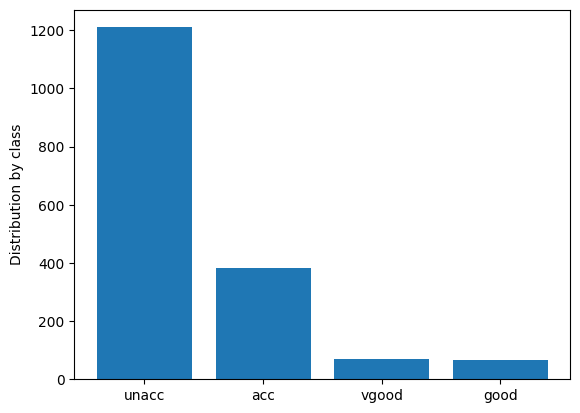

In [121]:
plot("class")

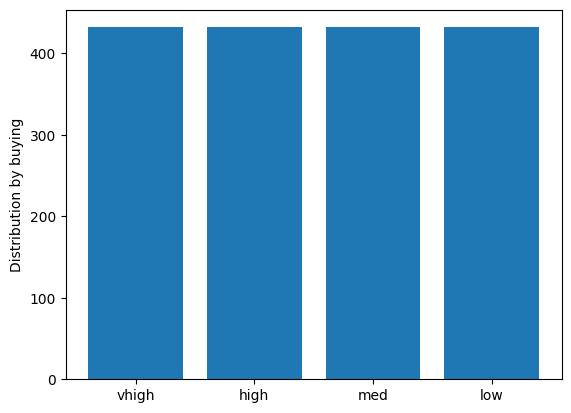

In [122]:
plot("buying")

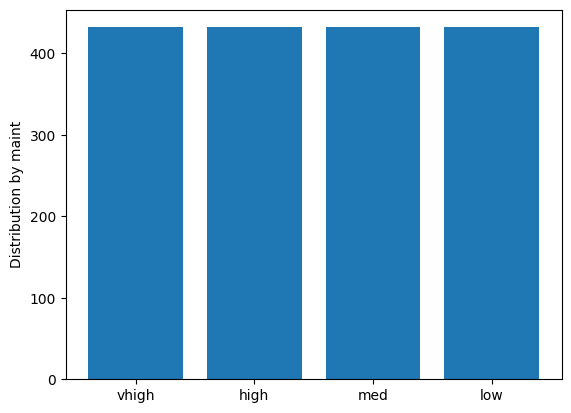

In [123]:
plot("maint")

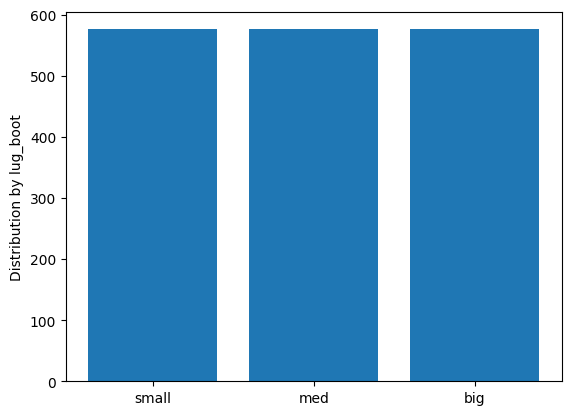

In [124]:
plot("lug_boot")

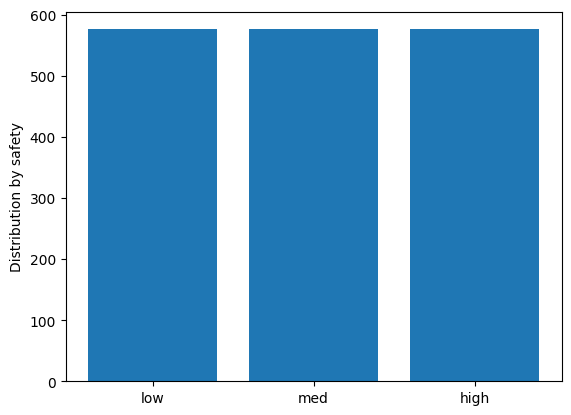

In [125]:
plot("safety")

In [126]:
encoder = ce.OrdinalEncoder(cols = ['buying','maint','doors','persons','lug_boot','safety','class'])
df = encoder.fit_transform(df)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


- Terminada la parte de EDA, se procede a dividir los datos que serán de 'TRAIN' y los que serán de 'TEST'

In [127]:
x = df.drop(['class'], axis =1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
print("x_train: {}".format(x_train.shape))
print("x_test:  {}".format(x_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test:  {}".format(y_test.shape))


x_train: (1209, 6)
x_test:  (519, 6)
y_train: (1209,)
y_test:  (519,)


- Se definen los parametros de evaluacion

In [128]:
def parametros_de_evaluacion(y_train, y_predic_train, y_test, y_predic_test):
  print("..................................................................................")
  print("Reporte de la data ENTRENADA clasificada")
  print(classification_report(y_train, y_predic_train))
  print("Reporte de la data EVALUADA clasificada")
  print(classification_report(y_test, y_predic_test))
  print("..................................................................................")

  # Accuracy
  print("El Accuracy en la data ENTRENADA es:   {}".format(round(accuracy_score(y_train,y_predic_train),2)))
  print("El Accuracy en la data EVALUADA es:    {}".format(round(accuracy_score(y_test,y_predic_test),2)))
  print("..................................................................................")

  # Precision
  print("El precision en la data ENTRENADA es:  {}".format(round(precision_score(y_train,y_predic_train,average = "weighted"),2)))
  print("El precision en la data EVALUADA es:   {}".format(round(precision_score(y_test,y_predic_test,average = "weighted"),2)))
  print("..................................................................................")

  # Recall
  print("El Recall en la data ENTRENADA es:   {}".format(round(recall_score(y_train,y_predic_train,average = "weighted"),2)))
  print("El Recall en la data EVALUADA es:    {}".format(round(recall_score(y_test,y_predic_test,average = "weighted"),2)))
  print("..................................................................................")

  # F1 Score
  print("El F1 Score en la data ENTRENADA es: {}".format(round(f1_score(y_train,y_predic_train,average = "weighted"),2)))
  print("El F1 Score en la data EVALUADA es:  {}".format(round(f1_score(y_test,y_predic_test,average = "weighted"),2)))
  print("..................................................................................")

** *REGRESION LOGISTICA* **

In [129]:
lr = LogisticRegression(max_iter = 1000,random_state = 48)
lr.fit(x_train,y_train)

y_predic_train = lr.predict(x_train)
y_predic_test = lr.predict(x_test)


parametros_de_evaluacion(y_train, y_predic_train, y_test, y_predic_test)



..................................................................................
Reporte de la data ENTRENADA clasificada
              precision    recall  f1-score   support

           1       0.88      0.93      0.90       840
           2       0.67      0.60      0.63       269
           3       0.79      0.72      0.75        46
           4       0.63      0.48      0.55        54

    accuracy                           0.83      1209
   macro avg       0.74      0.68      0.71      1209
weighted avg       0.82      0.83      0.82      1209

Reporte de la data EVALUADA clasificada
              precision    recall  f1-score   support

           1       0.89      0.93      0.91       370
           2       0.67      0.59      0.63       115
           3       0.71      0.63      0.67        19
           4       0.33      0.27      0.30        15

    accuracy                           0.83       519
   macro avg       0.65      0.61      0.63       519
weighted avg       0.

** *RANDOM FOREST* **

In [130]:
random_f = RandomForestClassifier(max_depth = 7,random_state = 48)
random_f.fit(x_train,y_train)

y_predic_train = random_f.predict(x_train)
y_predic_test = random_f.predict(x_test)


parametros_de_evaluacion(y_train, y_predic_train, y_test, y_predic_test)

..................................................................................
Reporte de la data ENTRENADA clasificada
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       840
           2       0.93      0.98      0.95       269
           3       0.90      0.80      0.85        46
           4       0.92      0.91      0.92        54

    accuracy                           0.98      1209
   macro avg       0.94      0.92      0.93      1209
weighted avg       0.98      0.98      0.98      1209

Reporte de la data EVALUADA clasificada
              precision    recall  f1-score   support

           1       0.99      0.97      0.98       370
           2       0.86      0.95      0.90       115
           3       0.88      0.79      0.83        19
           4       0.77      0.67      0.71        15

    accuracy                           0.95       519
   macro avg       0.87      0.84      0.86       519
weighted avg       0.

** *ARBOL DE DECISIÓN* **

In [131]:
arbol_d = DecisionTreeClassifier(max_depth = 7,random_state = 48)
arbol_d.fit(x_train,y_train)

y_predic_train = arbol_d.predict(x_train)
y_predic_test = arbol_d.predict(x_test)


parametros_de_evaluacion(y_train, y_predic_train, y_test, y_predic_test)

..................................................................................
Reporte de la data ENTRENADA clasificada
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       840
           2       0.89      0.89      0.89       269
           3       0.82      0.80      0.81        46
           4       0.88      0.65      0.74        54

    accuracy                           0.94      1209
   macro avg       0.89      0.83      0.86      1209
weighted avg       0.94      0.94      0.94      1209

Reporte de la data EVALUADA clasificada
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       370
           2       0.88      0.82      0.85       115
           3       0.79      0.79      0.79        19
           4       0.56      0.60      0.58        15

    accuracy                           0.93       519
   macro avg       0.80      0.80      0.80       519
weighted avg       0.

Conclusion final


- Se implementaron 3 modelos para evaluar la mejor prediccion. (Regresion logistica, Random forest y arbol de decision)
- Se emplearon parametros de evaluacion (Accuracy, Precision, F1-Score y Recall).
- Cada modelo demostro un desempeño altisimo, pero la que se destaco entre las 3 fue la de Random Forest

In [135]:
! jupyter nbconvert --to html car_evaluation.ipynb

[NbConvertApp] Converting notebook car_evaluation.ipynb to html
[NbConvertApp] Writing 741301 bytes to car_evaluation.html
